1- Getting data and creating input and label tensors 

X_list: [2.62  2.875 2.32  3.215 3.44  3.46  3.57  3.19  3.15  3.44  3.44  4.07
 3.73  3.78  5.25  5.424 5.345 2.2   1.615 1.835 2.465 3.52  3.435 3.84
 3.845 1.935 2.14  1.513 3.17  2.77  3.57  2.78 ]
y_list: [21.  21.  22.8 21.4 18.7 18.1 14.3 24.4 22.8 19.2 17.8 16.4 17.3 15.2
 10.4 10.4 14.7 32.4 30.4 33.9 21.5 15.5 15.2 13.3 19.2 27.3 26.  30.4
 15.8 19.7 15.  21.4]
X_np (5 first): [[2.62 ]
 [2.875]
 [2.32 ]
 [3.215]
 [3.44 ]]
y_np (5 first): [[21. ]
 [21. ]
 [22.8]
 [21.4]
 [18.7]]
X (5 first): tensor([[2.6200],
        [2.8750],
        [2.3200],
        [3.2150],
        [3.4400]])
y (5 first): tensor([21.0000, 21.0000, 22.8000, 21.4000, 18.7000], dtype=torch.float64)


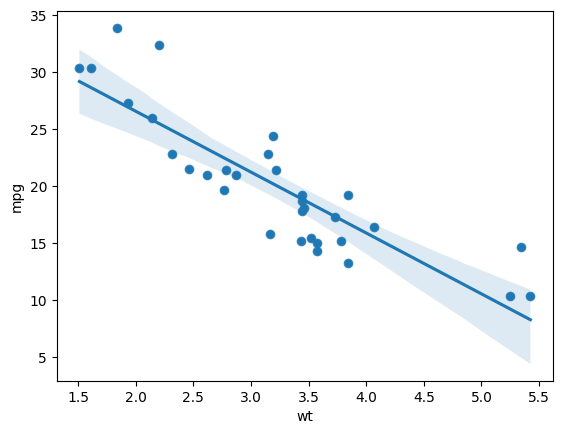

In [26]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn 
import seaborn as sns

cars_file = 'https://gist.githubusercontent.com/noamross/e5d3e859aa0c794be10b/raw/b999fb4425b54c63cab088c0ce2c0d6ce961a563/cars.csv'
cars = pd.read_csv(cars_file)
cars.head()

sns.scatterplot(x='wt', y='mpg', data=cars)
sns.regplot(x='wt', y='mpg', data=cars)

# values as a list of numbers 
X_list = cars.wt.values
y_list = cars.mpg.values
print(f'X_list: {X_list}')
print(f'y_list: {y_list}')

# values as a list of "elements"
X_np = np.array(X_list, dtype=np.float32).reshape(-1,1) # there were already arrays, the reshape (like in lstm models) is what matters 
y_np = np.array(y_list, dtype=np.float32).reshape(-1,1)
print(f'X_np (5 first): {X_np[:5]}')
print(f'y_np (5 first): {y_np[:5]}')

# now tensors 
X = torch.from_numpy(X_np) # from numpy is more efficient, it makes reference, not copy in memory
y = torch.tensor(y_list) # why a list?¿
print(f'X (5 first): {X[:5]}')
print(f'y (5 first): {y[:5]}')


2- create and train the model 

In [45]:
# define weights and bias (basically define the model)
w = torch.rand(1, requires_grad=True, dtype=torch.float64)
b = torch.rand(1, requires_grad=True, dtype=torch.float64)

# define hyperparameters
num_epochs = 1000
learning_rate = 1e-3

for epoch in range(num_epochs):
    for i in range(len(X)):
        # Forward pass (just model definition)
        y_predict = X[i] * w + b

        # Define the loss function as a tensor 
        loss_tensor = torch.pow(y_predict - y[i], 2)

        # Backward pass 
        loss_tensor.backward() # Derivative of error (generating w.grad and b.grad)

        # extract losses 
        loss_value = loss_tensor.data[0] 

        # updating the values 
        with torch.no_grad(): # no queremos que pytorch recalcule el gradiente hasta ls proxima iteracion
            w -= w.grad * learning_rate 
            # El gradiente indica la dirección de máximo cambio de la función de error con respecto al tensor w, por lo cual restamos en la dirección opuesta al tensor para ir hacia abajo en la función de error 
            b -= b.grad * learning_rate
            w.grad.zero_()
            b.grad.zero_()

    print(loss_value)
print(f"Weight: {w.item()}, Bias: {b.item()}")


tensor(153.9559, dtype=torch.float64)
tensor(80.0517, dtype=torch.float64)
tensor(54.2231, dtype=torch.float64)
tensor(43.9427, dtype=torch.float64)
tensor(39.4145, dtype=torch.float64)
tensor(37.2211, dtype=torch.float64)
tensor(36.0280, dtype=torch.float64)
tensor(35.2762, dtype=torch.float64)
tensor(34.7229, dtype=torch.float64)
tensor(34.2608, dtype=torch.float64)
tensor(33.8418, dtype=torch.float64)
tensor(33.4444, dtype=torch.float64)
tensor(33.0589, dtype=torch.float64)
tensor(32.6809, dtype=torch.float64)
tensor(32.3085, dtype=torch.float64)
tensor(31.9407, dtype=torch.float64)
tensor(31.5772, dtype=torch.float64)
tensor(31.2176, dtype=torch.float64)
tensor(30.8618, dtype=torch.float64)
tensor(30.5099, dtype=torch.float64)
tensor(30.1617, dtype=torch.float64)
tensor(29.8172, dtype=torch.float64)
tensor(29.4764, dtype=torch.float64)
tensor(29.1391, dtype=torch.float64)
tensor(28.8055, dtype=torch.float64)
tensor(28.4753, dtype=torch.float64)
tensor(28.1487, dtype=torch.float64)


w.grad es el gradiente del tensor w con respecto a alguna función de pérdida. PyTorch calcula automáticamente los gradientes durante el proceso de retropropagación (backpropagation) cuando se llama al método backward() en la función de pérdida.

<Axes: >

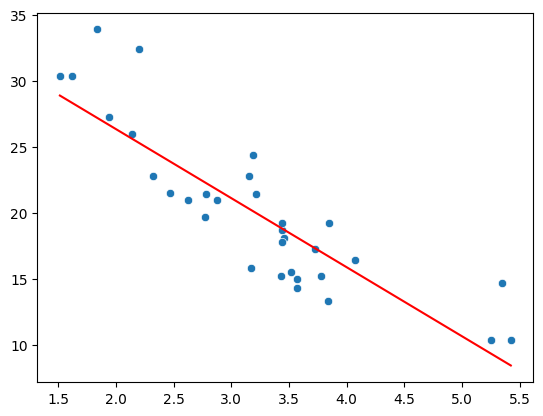

In [46]:
import os
from torchviz import make_dot
from sklearn.linear_model import LinearRegression

y_pred = (torch.tensor(X_list)*w+b).detach().numpy() # vuelta a numpy solo para plot
sns.scatterplot(x=X_list, y=y_list)
sns.lineplot(x=X_list, y=y_pred, color='red')


Slope: [-5.3444715], Bias: 37.285125732421875


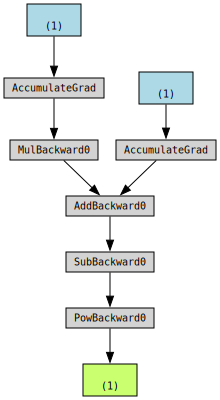

In [47]:
reg = LinearRegression().fit(X_np, y_list) # with scikit learn for comparision
print(f"Slope: {reg.coef_}, Bias: {reg.intercept_}")

os.environ['PATH'] += os.pathsep + 'C:/Program Files/Graphviz/bin'
make_dot(loss_tensor)